A Juypter notebook to visualize the outputs of Spartran
-------------------------------------------------------
Yan-Rong Li (email: liyanrong at ihep.ac.cn)

Required packages:
- re
- Numpy 
- Matplotlib

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
plt.rc("text", usetex=True)
plt.rc("font", family='serif', size=15)

Input parameters
------------------------
Input parameter file is at **data/datain.txt**.

In [2]:
with open("datain.txt") as fp:
    lines = fp.readlines()
    
    # search the location of ADAF block
    print("ADAF:")
    for i, line in enumerate(lines):
        if re.search("ADAF", line) != None:
            break
    
    for line in lines[i+1:i+8]:
        print(line[:-2])
    
    # search the location of Lin block
    print("\nInner specific angular momentum:")
    for i, line in enumerate(lines):
        if re.search("AUTO", line) != None:
            break
    
    for line in lines[i+1:i+3]:
        print(line[:-2])
    
    # search the location of Inclination block
    print("\nInclination angle:")
    for i, line in enumerate(lines):
        if re.search("OBS", line) != None:
            break
    
    for line in lines[i+1:i+2]:
        print(line[:-2])
    
    

ADAF:
 M = 3.2d9,
 MDOT =10.0d-5
 ALPHA =  0.1d0,
 BETA =  0.5d0,
 GAMMAA =  1.6666666666667d0
 ASTAR = 0.7d0
 VISF = 1.0d-1

Inner specific angular momentum:
 LINMAX = 2.5d0
 LINMIN = 1.0d0

Inclination angle:
 THETA_OBS = 30.0d0


Ploting instrinsic spectrum
---------------------------------------

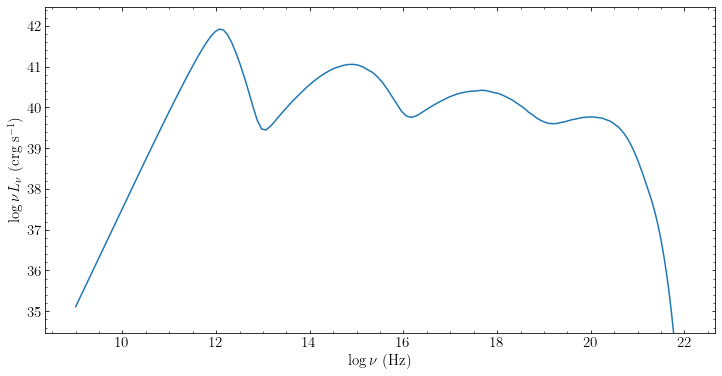

In [3]:
inst_spec = np.loadtxt("spectrum.dat")
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.plot(inst_spec[:, 0], inst_spec[:, 1])
ylim = ax.get_ylim()
ax.set_ylim(ylim[1]-8, ylim[1])
ax.set_xlabel(r"$\log \nu$ (Hz)")
ax.set_ylabel(r"$\log \nu L_\nu$ (erg~s$^{-1}$)")
ax.minorticks_on()
plt.show()

Plotting instrinsic spectrum at each radius
-------------------------------------------------------------

The Schwarzschild radius: $ R_S = 2GM/c^2 $ .


1.608562 #in unit of Rs


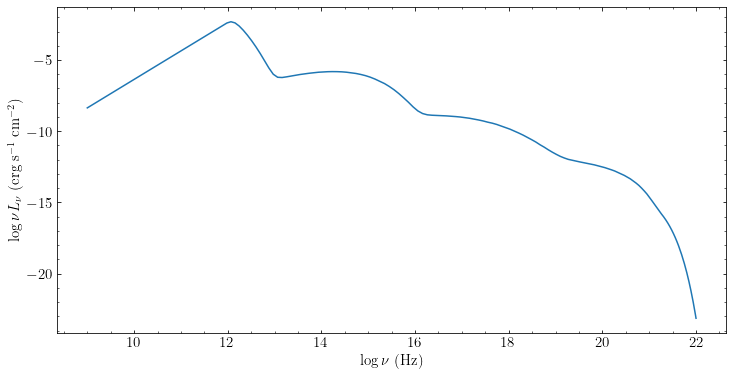

In [4]:
solspec = np.loadtxt("sol_for_spec.dat")
radius = solspec[:, 0]
nr = solspec.shape[0]
ir = nr-10 # the id of radius to plot 
print(radius[ir], "#in unit of Rs")
spec = np.loadtxt("spec/spec%03d.txt"%ir)
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.plot(spec[:, 0], spec[:, 1])
ylim = ax.get_ylim()
#ax.set_ylim(ylim[1]-8, ylim[1])
ax.set_xlabel(r"$\log \nu$ (Hz)")
ax.set_ylabel(r"$\log \nu L_\nu$ (erg~s$^{-1}$~cm$^{-2}$)")
ax.minorticks_on()
plt.show()

Plotting observed spectrum
--------------------------

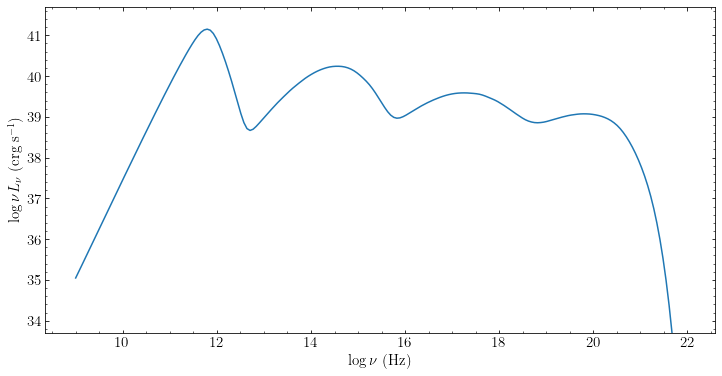

In [5]:
obs_spec = np.loadtxt("specobs.dat")
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
ax.plot(obs_spec[:, 0], obs_spec[:, 1])
ylim = ax.get_ylim()
ax.set_ylim(ylim[1]-8, ylim[1])
ax.set_xlabel(r"$\log \nu$ (Hz)")
ax.set_ylabel(r"$\log \nu L_\nu$ (erg~s$^{-1}$)")
ax.minorticks_on()
plt.show()

Plotting ADAF solutions
----------------------------------
The Schwarzschild radius: $ R_S = 2GM/c^2 $ .

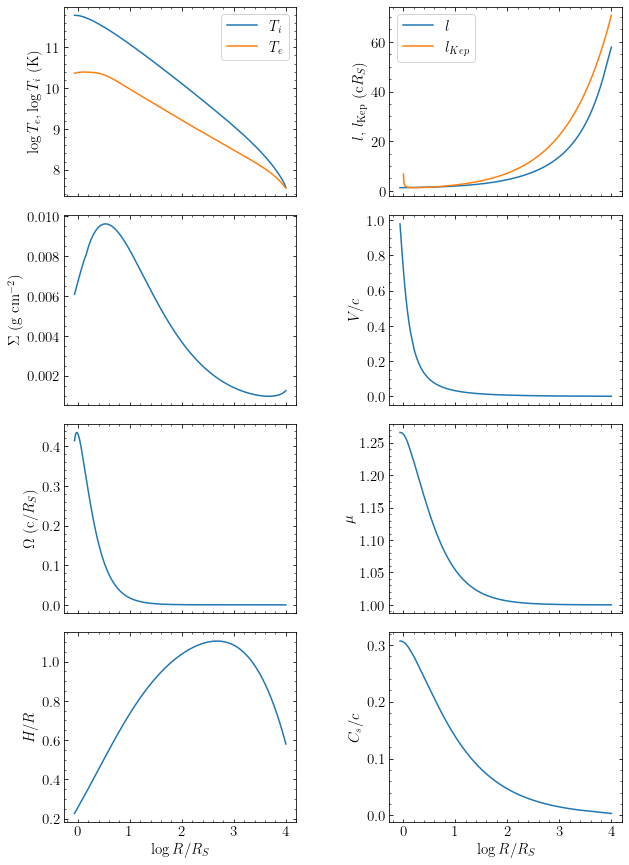

In [6]:
soltot = np.genfromtxt("soltot.dat",missing_values="NAN")
labels=[r"$\Sigma$ (g cm$^{-2}$)", r"$V/c$", r"$\Omega$ (c/$R_S$)", r"$\mu$", r"$H/R$", r"$C_s/c$", r"$l$", r"l_{\rm Kep}"]
fig = plt.figure(figsize=(10, 15))
fig.subplots_adjust(hspace=0.1, wspace=0.4)

ax = fig.add_subplot(4,2,1)
ax.plot(soltot[:, 0], soltot[:, 1], label=r'$T_i$')
ax.plot(soltot[:, 0], soltot[:, 2], label=r'$T_e$')
ax.minorticks_on()
ax.set_xticklabels([])
ax.legend()
ax.set_ylabel(r"$\log T_e, \log T_i$ (K)")

ax = fig.add_subplot(4,2,2)
ax.plot(soltot[:, 0], soltot[:, 9], label=r'$l$')
ax.plot(soltot[:, 0], soltot[:, 10], label=r'$l_{Kep}$')
ax.minorticks_on()
ax.set_xticklabels([])
ax.legend()
ax.set_ylabel(r"$l$, $l_{\rm Kep}$ (c$R_S$)")
for i in range(6):
    ax = fig.add_subplot(4,2,i+3)
    ax.plot(soltot[:, 0], soltot[:, i+3])
    ax.minorticks_on()
    ax.set_ylabel(labels[i])
    if i<4:
        ax.set_xticklabels([])
    else:
        ax.set_xlabel(r"$\log R/R_S$")
    

ax.minorticks_on()
plt.show()